In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score


In [51]:
adult_df = pd.read_csv('adult.csv', header=None)
adult_df.columns = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation',
'relationship','race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_pais','income']
adult_df.head()


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_pais,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [52]:
cats = ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex','native_pais', 'income']
nums = ['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']

In [53]:
adult_df[cats].head()

,workclass,education,marital_status,occupation,relationship,race,sex,native_pais,income
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K


<AxesSubplot:xlabel='income', ylabel='count'>

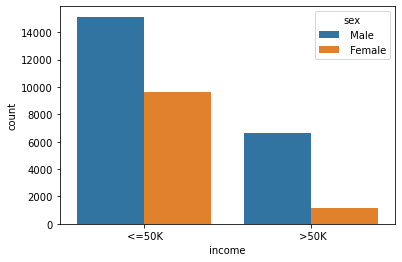

In [54]:
 sns.countplot(x=adult_df['income'], hue='sex', data=adult_df)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, ' HS-grad'),
  Text(1, 0, ' Some-college'),
  Text(2, 0, ' Bachelors'),
  Text(3, 0, ' Masters'),
  Text(4, 0, ' Assoc-voc'),
  Text(5, 0, ' 11th'),
  Text(6, 0, ' Assoc-acdm'),
  Text(7, 0, ' 10th'),
  Text(8, 0, ' 7th-8th'),
  Text(9, 0, ' Prof-school'),
  Text(10, 0, ' 9th'),
  Text(11, 0, ' 12th'),
  Text(12, 0, ' Doctorate'),
  Text(13, 0, ' 5th-6th'),
  Text(14, 0, ' 1st-4th'),
  Text(15, 0, ' Preschool')])

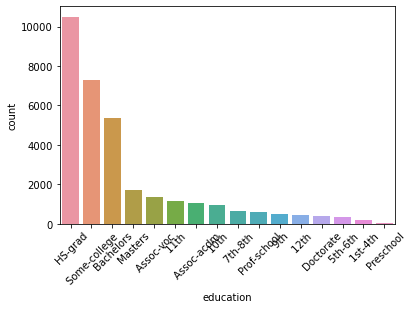

In [55]:
sns.countplot(x=adult_df['education'], order=adult_df['education'].value_counts().index)
plt.xticks(rotation=45)


<AxesSubplot:xlabel='race', ylabel='count'>

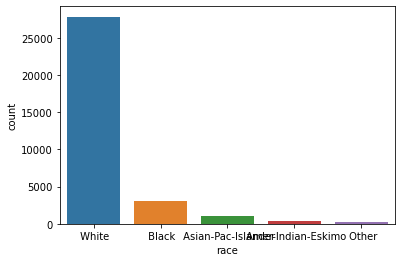

In [56]:
sns.countplot(x=adult_df['race'], data=adult_df)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, ' Prof-specialty'),
  Text(1, 0, ' Craft-repair'),
  Text(2, 0, ' Exec-managerial'),
  Text(3, 0, ' Adm-clerical'),
  Text(4, 0, ' Sales'),
  Text(5, 0, ' Other-service'),
  Text(6, 0, ' Machine-op-inspct'),
  Text(7, 0, ' ?'),
  Text(8, 0, ' Transport-moving'),
  Text(9, 0, ' Handlers-cleaners'),
  Text(10, 0, ' Farming-fishing'),
  Text(11, 0, ' Tech-support'),
  Text(12, 0, ' Protective-serv'),
  Text(13, 0, ' Priv-house-serv'),
  Text(14, 0, ' Armed-Forces')])

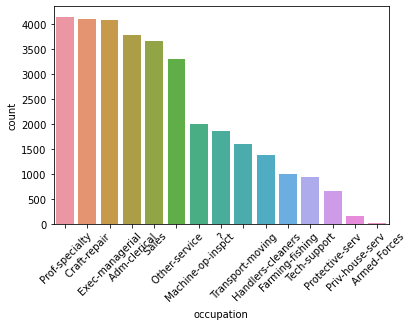

In [57]:
sns.countplot(x=adult_df['occupation'], data=adult_df, order=adult_df['occupation'].value_counts().index)
plt.xticks(rotation=45)

In [58]:
adult_df['workclass'] = adult_df['workclass'].replace('?', np.NaN)
adult_df['occupation'] = adult_df['occupation'].replace('?', np.NaN)
adult_df['native_country'] = adult_df['native_pais'].replace('?', np.NaN)

# sns.barplot(x=adult_df.columns, y=adult_df.isnull().sum().values)
# plt.xticks(rotation=45)
# plt.show()

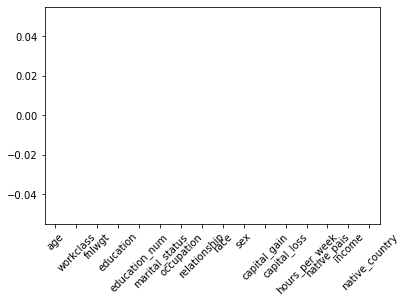

In [59]:
sns.barplot(x=adult_df.columns, y=adult_df.isnull().sum().values)
plt.xticks(rotation=45)
plt.show()


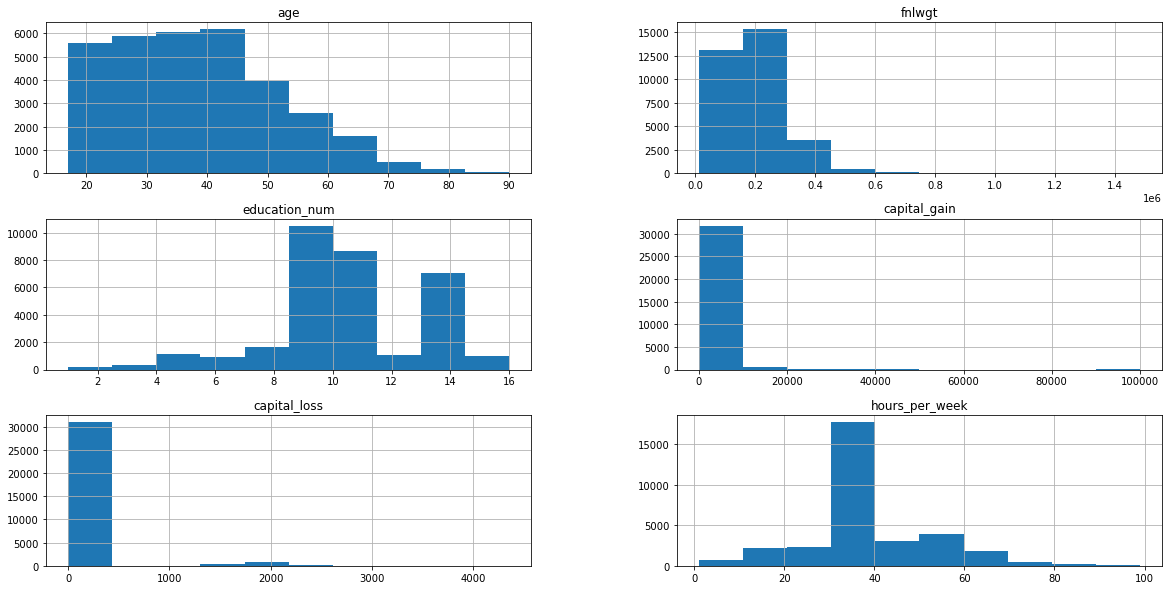

In [60]:
for variable in numericals:
    if not adult_df[adult_df[variable] == ' ?'].empty:
        print(f'{variable} contains missing values ( ?)')

adult_df[numericals].hist(figsize=(20, 10))
plt.show()


In [61]:
adult_df['workclass'].fillna(adult_df['workclass'].mode()[0], inplace=True)
adult_df['occupation'].fillna(adult_df['occupation'].mode()[0], inplace=True)
adult_df['native_pais'].fillna(adult_df['native_pais'].mode()[0], inplace=True)

adult_df = pd.get_dummies(data=adult_df, columns=cats, drop_first=True)


In [62]:
adult_df.tail()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,native_country,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,...,native_pais_ Puerto-Rico,native_pais_ Scotland,native_pais_ South,native_pais_ Taiwan,native_pais_ Thailand,native_pais_ Trinadad&Tobago,native_pais_ United-States,native_pais_ Vietnam,native_pais_ Yugoslavia,income_ >50K
32556,27,257302,12,0,0,38,United-States,0,0,0,...,0,0,0,0,0,0,1,0,0,0
32557,40,154374,9,0,0,40,United-States,0,0,0,...,0,0,0,0,0,0,1,0,0,1
32558,58,151910,9,0,0,40,United-States,0,0,0,...,0,0,0,0,0,0,1,0,0,0
32559,22,201490,9,0,0,20,United-States,0,0,0,...,0,0,0,0,0,0,1,0,0,0
32560,52,287927,9,15024,0,40,United-States,0,0,0,...,0,0,0,0,0,0,1,0,0,1


In [63]:
adult_df = adult_df.drop(columns= 'native_country')

In [64]:
adult_df.head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,...,native_pais_ Puerto-Rico,native_pais_ Scotland,native_pais_ South,native_pais_ Taiwan,native_pais_ Thailand,native_pais_ Trinadad&Tobago,native_pais_ United-States,native_pais_ Vietnam,native_pais_ Yugoslavia,income_ >50K
0,39,77516,13,2174,0,40,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,50,83311,13,0,0,13,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,38,215646,9,0,0,40,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
3,53,234721,7,0,0,40,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
4,28,338409,13,0,0,40,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [65]:
X = adult_df.drop('income_ >50K', axis=1)
y = adult_df['income_ >50K']

scaler = RobustScaler()
X_scaled = scaler.fit_transform(X[numericals])
X[numericals] = X_scaled


In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)

In [71]:
print('accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))
y_pred_train = gnb.predict(X_train)
print('Training set score: {:.4f}'.format(gnb.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(gnb.score(X_test, y_test)))


accuracy score: 0.8264
Training set score: 0.8261
Test set score: 0.8264


In [72]:
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) =', cm[0,0])
print('\nTrue Negatives(TN) =', cm[1,1])
print('\nFalse Positives(FP) =', cm[0,1])
print('\nFalse Negatives(FN) =', cm[1,0])


Confusion matrix

 [[6347 1065]
 [ 631 1726]]

True Positives(TP) = 6347

True Negatives(TN) = 1726

False Positives(FP) = 1065

False Negatives(FN) = 631


In [73]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.91      0.86      0.88      7412
           1       0.62      0.73      0.67      2357

    accuracy                           0.83      9769
   macro avg       0.76      0.79      0.78      9769
weighted avg       0.84      0.83      0.83      9769



In [76]:
scores = cross_val_score(gnb, X_train, y_train, cv = 10, scoring='accuracy')
print('Cross val scores:{}'.format(scores))

print('\nAverage cross val score: {:.4f}'.format(scores.mean()))

Cross val scores:[0.81666667 0.8254386  0.82316806 0.83545415 0.83018868 0.80517771
 0.82097411 0.82404563 0.84817903 0.82887231]

Average cross val score: 0.8258
